In [1]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# import seaborn as sns
import palettable.colorbrewer.diverging as pld
import palettable as pt

import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [4]:
import palettable
palette2 = palettable.colorbrewer.diverging.RdYlGn_8_r
RdYlGn_8_r = palette2.mpl_colormap
palette2.mpl_colors

[(0.10196078431372549, 0.596078431372549, 0.3137254901960784),
 (0.4, 0.7411764705882353, 0.38823529411764707),
 (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 (0.8509803921568627, 0.9372549019607843, 0.5450980392156862),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.8431372549019608, 0.18823529411764706, 0.15294117647058825)]

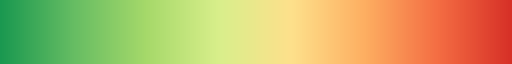

In [5]:
RdYlGn_8_r

In [6]:
palette2.hex_colors

['#1A9850',
 '#66BD63',
 '#A6D96A',
 '#D9EF8B',
 '#FEE08B',
 '#FDAE61',
 '#F46D43',
 '#D73027']

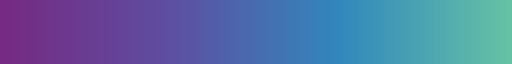

In [7]:
from matplotlib.colors import LinearSegmentedColormap
colors = [
    # (0.25098039215686274, 0.0, 0.29411764705882354), 
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
 # (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
 # (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 # (0.10196078431372549, 0.5882352941176471, 0.2549019607843137), 
         ]
BlGn = LinearSegmentedColormap.from_list('BlGn', colors, N=100)
BlGn

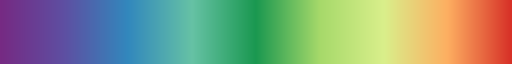

In [8]:
RdGnpu_mpl_colors: list = [
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
    
    (0.10196078431372549, 0.596078431372549, 0.3137254901960784), 
    
    # (0.4, 0.7411764705882353, 0.38823529411764707), 
    (0.6509803921568628, 0.8509803921568627, 0.41568627450980394), 
    (0.8509803921568627, 0.9372549019607843, 0.5450980392156862), 
    # (0.996078431372549, 0.8784313725490196, 0.5450980392156862), 
    (0.9921568627450981, 0.6823529411764706, 0.3803921568627451), 
    # (0.9568627450980393, 0.42745098039215684, 0.2627450980392157), 
    (0.8431372549019608, 0.18823529411764706, 0.15294117647058825), 
]
RdGnpu = LinearSegmentedColormap.from_list('RdGnpu', RdGnpu_mpl_colors, N=10000)
RdGnpu

In [9]:
from matplotlib.colors import rgb_to_hsv, to_hex
k = 9 #len(data_keys)
color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.sequential.GnBu_9
# cmap = RdGnpu.mpl_colormap
cmap = RdGnpu

i = 0
for kk in color_idx:
    hex_ = to_hex(cmap(kk))
    print(f'{i = }, kk = {kk:.3f}, {hex_ = }')
    i += 1

i = 0, kk = 0.000, hex_ = '#762a83'
i = 1, kk = 0.125, hex_ = '#5e4fa2'
i = 2, kk = 0.250, hex_ = '#3288bd'
i = 3, kk = 0.375, hex_ = '#66c2a5'
i = 4, kk = 0.500, hex_ = '#1a9850'
i = 5, kk = 0.625, hex_ = '#a6d96a'
i = 6, kk = 0.750, hex_ = '#d9ef8b'
i = 7, kk = 0.875, hex_ = '#fdae61'
i = 8, kk = 1.000, hex_ = '#d73027'


## Find path of single phase .fgr files (exported fitting results by PDFgui) in Figure_6/single_phase

In [10]:
folder_base:str = '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/'
s_fgr_identifier:str = os.path.join(folder_base, 'Figure_6', 'single_phase', '**.fgr')
s_fgr_path:list = glob.glob(s_fgr_identifier)
s_fgr_path.sort()
s_fgr_basename:list = [os.path.basename(n) for n in s_fgr_path]
print(*s_fgr_basename, sep='\n')

CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.fgr
CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.fgr
CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.fgr
CsPbBr2-Cl_8micl_10m_20220331-013211_a7121b_primary-1_mean_q.fgr


## Find path of dual phase .fgr files (exported fitting results by PDFgui) in Figure_6/dual_phase

In [11]:
folder_base:str = '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/'
d_fgr_identifier:str = os.path.join(folder_base, 'Figure_6', 'dual_phase', '**.fgr')
d_fgr_path:list = glob.glob(d_fgr_identifier)
d_fgr_path.sort()
d_fgr_basename:list = [os.path.basename(n) for n in d_fgr_path]
print(*d_fgr_basename, sep='\n')

CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.fgr
CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.fgr
CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.fgr
CsPbBr2-Cl_8micl_10m_20220331-013211_a7121b_primary-1_mean_q.fgr


## Find path of G(r) in folder: Figure_1

In [12]:
folder_base:str = '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/'
gr_identifier:str = os.path.join(folder_base, 'Halide Exchange Data', 'CsPb**.gr')
gr_path:list = glob.glob(gr_identifier)
gr_path.sort()
gr_basename:list = [os.path.basename(n) for n in gr_path]
print(*gr_basename, sep='\n')

CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.gr
CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.gr
CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.gr
CsPbBr2-Cl_8micl_10m_20220331-013211_a7121b_primary-1_mean_q.gr
CsPbBr2-I_16micl_10m_20220331-174358_03721b_primary-1_mean_q.gr
CsPbBr2-I_32micl_10m_20220331-170247_0063a7_primary-1_mean_q.gr
CsPbBr2-I_64micl_10m_20220331-162851_06d064_primary-1_mean_q.gr
CsPbBr2-I_8micl_10m_20220331-181657_70819d_primary-1_mean_q.gr
CsPbBr2_10m_20220330-230818_e61560_primary-1_mean_q.gr


## Organize data key and fgr path as a data dictonary 

In [13]:
# data_keys:list = ['Cl_64micl', 'Cl_32micl', 'Cl_16micl', 'Cl_8micl', 'CsPbBr2_10m', 'I_8micl', 'I_16micl', 'I_32micl', 'I_64micl']
data_keys:list = ['Cl_64micl', 'Cl_32micl', 'Cl_16micl', 'Cl_8micl', ]
s_fgr_dict:dict = {}
d_fgr_dict:dict = {}
for key in data_keys:
    for s_path, d_path in zip(s_fgr_path, d_fgr_path):
        s_basename = os.path.basename(s_path)
        d_basename = os.path.basename(d_path)
        if key in s_basename:
            s_fgr_dict.update({key: s_path})
        if key in d_basename:
            d_fgr_dict.update({key: d_path})


In [14]:
s_fgr_dict

{'Cl_64micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_6/single_phase/CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.fgr',
 'Cl_32micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_6/single_phase/CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.fgr',
 'Cl_16micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_6/single_phase/CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.fgr',
 'Cl_8micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_

In [15]:
d_fgr_dict

{'Cl_64micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_6/dual_phase/CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.fgr',
 'Cl_32micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_6/dual_phase/CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.fgr',
 'Cl_16micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_6/dual_phase/CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.fgr',
 'Cl_8micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_6/dual

## Organize data key and gr path as a data dictonary

In [16]:
# data_keys:list = ['Cl_64micl', 'Cl_32micl', 'Cl_16micl', 'Cl_8micl', 'CsPbBr2_10m', 'I_8micl', 'I_16micl', 'I_32micl', 'I_64micl']
gr_dict:dict = {}
for key in data_keys:
    for _path in gr_path:
        basename = os.path.basename(_path)
        if key in basename:
            gr_dict.update({key: _path})

gr_dict

{'Cl_64micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_64micl_10m_20220330-234135_b41155_primary-1_mean_q.gr',
 'Cl_32micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_32micl_10m_20220331-001057_47942e_primary-1_mean_q.gr',
 'Cl_16micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed_data_figures/Figure_1/Halide Exchange Data/CsPbBr2-Cl_16micl_10m_20220331-004652_419192_primary-1_mean_q.gr',
 'Cl_8micl': '/Users/cheng-hunglin/Library/CloudStorage/GoogleDrive-chlin.tw1986@gmail.com/Other computers/My MacBook Pro/MAC_2015/Manuscript/In-Situ_Halide/processed

In [17]:
def is_float(s):    
    """
    Checks if a string can be successfully converted to a float.
    
    Args:
    s: The string to check.
    
    Returns:
    True if the string can be converted to a float, False otherwise.
    """
    try:
        float(s)
        return True
    except ValueError:
        return False

def get_HeaderRows(fn, sep=' ', num_data_column=2, check_range=100, check_float=True):

    cont_01 = []
    with open(fn, 'r') as f:
        cont = f.readlines()
        f.close()
    
    for line in cont:
        new_line = line.strip('\n').split(sep)
        cont_01.append(new_line)

    i = 0
    while i < len(cont_01):
        c0 = (len(cont_01[i]) == num_data_column)
        c1 = all([len(l)==num_data_column for l in cont_01[i:i+check_range]])
        c2 = (is_float(cont_01[i][0]) and is_float(cont_01[i][1]))

        if check_float:
            if c0 and c1 and c2:
                # print(f'Num of rows of header is {i}.')
                break
        else:
            if c0 and c1:
                # print(f'Num of rows of header is {i}.')
                break
            
        i += 1

    return i

In [18]:
def find_nearest(array, value):
    """find the nearest value in a given array

    Args:
        array (array_like): input array
        value (float): target value

    Returns:
        int: index of the nearest value in the array
        float: the nearest value in the array
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [19]:
def get_2d_index(index_1d, width):
  """
  Converts a 1D index to a 2D (row, column) index.

  Args:
    index_1d: The index in the 1D array/list.
    width: The number of columns in the 2D grid.

  Returns:
    A tuple (row, column) representing the 2D index.
  """
  row = index_1d // width  # Integer division to find the row
  col = index_1d % width   # Modulus operator to find the column
  return row, col

## Read fgr data into pandas

In [20]:
s_fgr_df:pd.DataFrame = pd.DataFrame()
d_fgr_df:pd.DataFrame = pd.DataFrame()

for key, fn in s_fgr_dict.items():
    skiprows = get_HeaderRows(fn, sep=' ', num_data_column=5, check_range=100, check_float=True)
    df = pd.read_csv(fn, sep=' ', names=['r(A)', 'G(r)', 'd_r', 'd_Gr', 'Gdiff'], skiprows=skiprows)
    s_fgr_df[f'r_{key}'] = df['r(A)']
    s_fgr_df[f'g_{key}'] = df['G(r)']
    s_fgr_df[f'dr_{key}'] = df['d_r']
    s_fgr_df[f'dg_{key}'] = df['d_Gr']
    s_fgr_df[f'dif_{key}'] = df['Gdiff']


for key, fn in d_fgr_dict.items():
    skiprows = get_HeaderRows(fn, sep=' ', num_data_column=5, check_range=100, check_float=True)
    df = pd.read_csv(fn, sep=' ', names=['r(A)', 'G(r)', 'd_r', 'd_Gr', 'Gdiff'], skiprows=skiprows)
    d_fgr_df[f'r_{key}'] = df['r(A)']
    d_fgr_df[f'g_{key}'] = df['G(r)']
    d_fgr_df[f'dr_{key}'] = df['d_r']
    d_fgr_df[f'dg_{key}'] = df['d_Gr']
    d_fgr_df[f'dif_{key}'] = df['Gdiff']



In [21]:
s_fgr_df

,r_Cl_64micl,g_Cl_64micl,dr_Cl_64micl,dg_Cl_64micl,dif_Cl_64micl,r_Cl_32micl,g_Cl_32micl,dr_Cl_32micl,dg_Cl_32micl,dif_Cl_32micl,r_Cl_16micl,g_Cl_16micl,dr_Cl_16micl,dg_Cl_16micl,dif_Cl_16micl,r_Cl_8micl,g_Cl_8micl,dr_Cl_8micl,dg_Cl_8micl,dif_Cl_8micl
0,1.99,-0.201588,0.0,0.037369,0.037369,1.99,-0.191790,0.0,-0.007960,-0.007960,1.99,-0.169696,0.0,-0.110824,-0.110824,1.99,-0.165015,0.0,-0.131243,-0.131243
1,2.00,-0.222761,0.0,0.054170,0.054170,2.00,-0.211787,0.0,0.007856,0.007856,2.00,-0.187239,0.0,-0.095479,-0.095479,2.00,-0.181930,0.0,-0.116312,-0.116312
2,2.01,-0.243628,0.0,0.069386,0.069386,2.01,-0.231432,0.0,0.022197,0.022197,2.01,-0.204378,0.0,-0.080161,-0.080161,2.01,-0.198382,0.0,-0.101229,-0.101229
3,2.02,-0.263999,0.0,0.083032,0.083032,2.02,-0.250545,0.0,0.035164,0.035164,2.02,-0.220955,0.0,-0.064927,-0.064927,2.02,-0.214215,0.0,-0.086096,-0.086096
4,2.03,-0.283696,0.0,0.095131,0.095131,2.03,-0.268958,0.0,0.046859,0.046859,2.03,-0.236823,0.0,-0.049843,-0.049843,2.03,-0.229290,0.0,-0.071015,-0.071015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,59.96,-0.004610,0.0,-0.018951,-0.018951,59.96,-0.005409,0.0,-0.025022,-0.025022,59.96,-0.001185,0.0,-0.005601,-0.005601,59.96,0.005119,0.0,-0.001659,-0.001659
5798,59.97,-0.004681,0.0,-0.022480,-0.022480,59.97,-0.005517,0.0,-0.027457,-0.027457,59.97,-0.001596,0.0,-0.006266,-0.006266,59.97,0.004582,0.0,-0.001894,-0.001894
5799,59.98,-0.004756,0.0,-0.025646,-0.025646,59.98,-0.005625,0.0,-0.029401,-0.029401,59.98,-0.002005,0.0,-0.006828,-0.006828,59.98,0.004041,0.0,-0.002094,-0.002094
5800,59.99,-0.004834,0.0,-0.028372,-0.028372,59.99,-0.005731,0.0,-0.030808,-0.030808,59.99,-0.002410,0.0,-0.007278,-0.007278,59.99,0.003498,0.0,-0.002259,-0.002259


In [22]:
d_fgr_df

,r_Cl_64micl,g_Cl_64micl,dr_Cl_64micl,dg_Cl_64micl,dif_Cl_64micl,r_Cl_32micl,g_Cl_32micl,dr_Cl_32micl,dg_Cl_32micl,dif_Cl_32micl,r_Cl_16micl,g_Cl_16micl,dr_Cl_16micl,dg_Cl_16micl,dif_Cl_16micl,r_Cl_8micl,g_Cl_8micl,dr_Cl_8micl,dg_Cl_8micl,dif_Cl_8micl
0,1.99,-0.203771,0.0,0.039552,0.039552,1.99,-0.195293,0.0,-0.004457,-0.004457,1.99,-0.163820,0.0,-0.116700,-0.116700,1.99,-0.166657,0.0,-0.129601,-0.129601
1,2.00,-0.225339,0.0,0.056748,0.056748,2.00,-0.215860,0.0,0.011929,0.011929,2.00,-0.180438,0.0,-0.102280,-0.102280,2.00,-0.183769,0.0,-0.114473,-0.114473
2,2.01,-0.246632,0.0,0.072390,0.072390,2.01,-0.236118,0.0,0.026883,0.026883,2.01,-0.196638,0.0,-0.087901,-0.087901,2.01,-0.200419,0.0,-0.099192,-0.099192
3,2.02,-0.267455,0.0,0.086488,0.086488,2.02,-0.255878,0.0,0.040497,0.040497,2.02,-0.212273,0.0,-0.073609,-0.073609,2.02,-0.216450,0.0,-0.083861,-0.083861
4,2.03,-0.287624,0.0,0.099059,0.099059,2.03,-0.274966,0.0,0.052867,0.052867,2.03,-0.227213,0.0,-0.059453,-0.059453,2.03,-0.231721,0.0,-0.068584,-0.068584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,59.96,-0.009754,0.0,-0.013807,-0.013807,59.96,-0.012305,0.0,-0.018126,-0.018126,59.96,-0.005610,0.0,-0.001176,-0.001176,59.96,0.005648,0.0,-0.002188,-0.002188
5798,59.97,-0.009835,0.0,-0.017326,-0.017326,59.97,-0.012252,0.0,-0.020723,-0.020723,59.97,-0.006050,0.0,-0.001813,-0.001813,59.97,0.005123,0.0,-0.002435,-0.002435
5799,59.98,-0.009929,0.0,-0.020474,-0.020474,59.98,-0.012193,0.0,-0.022832,-0.022832,59.98,-0.006481,0.0,-0.002353,-0.002353,59.98,0.004593,0.0,-0.002646,-0.002646
5800,59.99,-0.010035,0.0,-0.023172,-0.023172,59.99,-0.012128,0.0,-0.024412,-0.024412,59.99,-0.006901,0.0,-0.002787,-0.002787,59.99,0.004060,0.0,-0.002822,-0.002822


## Read gr data into pandas

In [23]:
gr_df:pd.DataFrame = pd.DataFrame()
# gr_df2:pd.DataFrame = pd.DataFrame()
for key, fn in gr_dict.items():
    skiprows = get_HeaderRows(fn, sep=' ', num_data_column=2, check_range=100, check_float=True)
    df = pd.read_csv(fn, sep=' ', names=['r(A)', 'G(r)'], skiprows=skiprows)
    gr_df[f'r_{key}'] = df['r(A)']
    gr_df[f'g_{key}'] = df['G(r)']
    # fgr_df[f'dr_{key}'] = df['d_r']
    # fgr_df[f'dg_{key}'] = df['d_Gr']
    # fgr_df[f'dif_{key}'] = df['Gdiff']

    # gr_df2[f'gr_{key}'] = df['G(r)']

gr_df

,r_Cl_64micl,g_Cl_64micl,r_Cl_32micl,g_Cl_32micl,r_Cl_16micl,g_Cl_16micl,r_Cl_8micl,g_Cl_8micl
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
1,0.01,0.002540,0.01,0.001241,0.01,0.002726,0.01,-0.000795
2,0.02,0.004941,0.02,0.002360,0.02,0.005331,0.02,-0.001593
3,0.03,0.007074,0.03,0.003243,0.03,0.007703,0.03,-0.002395
4,0.04,0.008823,0.04,0.003790,0.04,0.009738,0.04,-0.003203
...,...,...,...,...,...,...,...,...
9996,99.96,0.008268,99.96,0.005462,99.96,0.004148,99.96,0.003926
9997,99.97,0.006158,99.97,0.003130,99.97,0.003501,99.97,0.003629
9998,99.98,0.003940,99.98,0.000751,99.98,0.002796,99.98,0.003284
9999,99.99,0.001678,99.99,-0.001610,99.99,0.002050,99.99,0.002898


In [24]:
data_keys[:4][::-1]

['Cl_8micl', 'Cl_16micl', 'Cl_32micl', 'Cl_64micl']

In [25]:
Cl_keys = data_keys[:4][::-1]

In [26]:
data_keys[5:]

[]

In [27]:
I_keys = data_keys[5:]

## Plot data

In [28]:
gr_df[f'g_{data_keys[0]}']

0        0.000000
1        0.002540
2        0.004941
3        0.007074
4        0.008823
           ...   
9996     0.008268
9997     0.006158
9998     0.003940
9999     0.001678
10000   -0.000566
Name: g_Cl_64micl, Length: 10001, dtype: float64

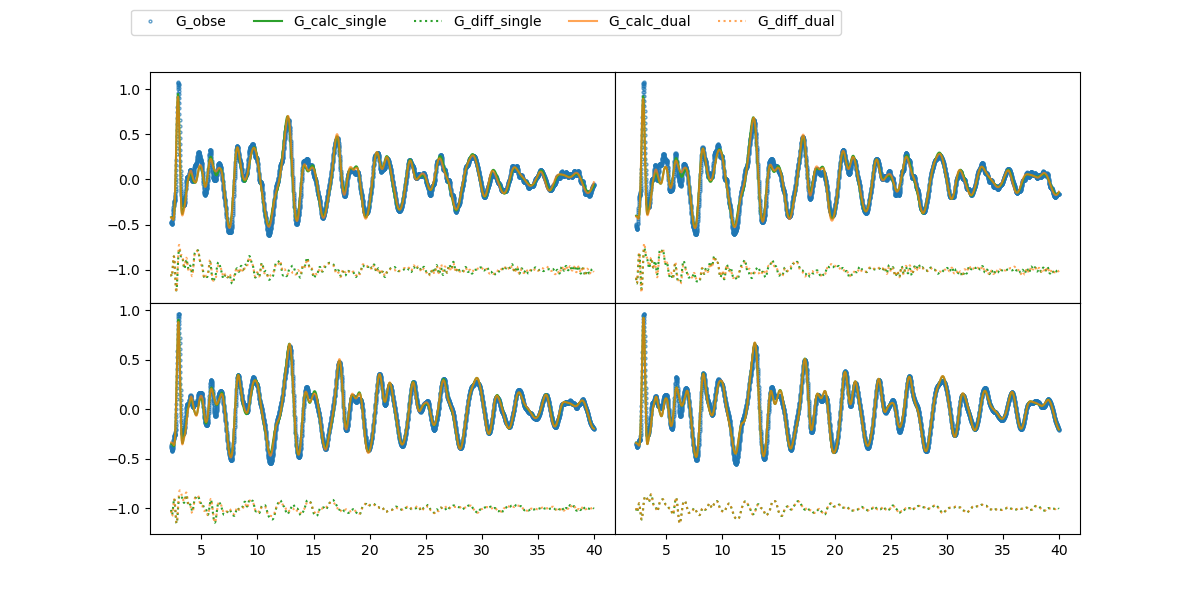

In [42]:
rows = 2
cols = 2

gs = GridSpec(nrows=rows, ncols=cols,) #height_ratios=[1.0, 1.0])
f0 = plt.figure(figsize=(12, 6), ) #constrained_layout=True)
# ax0 = f0.add_subplot(gs[:,:])

k = len(data_keys)
color_idx = np.linspace(0, 1, k)

# palette = pt.colorbrewer.sequential.GnBu_9
# cmap = RdGnpu.mpl_colormap
cmap = RdGnpu

r_min = 2.3
r_max = 40

y_offset = 1.0
# x_min = 0
# x_max = 4000


unit = "\u00B5L/min"
subscript_2 = "\u2082"
obse_keys:list = [f'ZnCl{subscript_2} 64{unit}', 
                  f'ZnCl{subscript_2} 32{unit}', 
                  f'ZnCl{subscript_2} 16{unit}', 
                  f'ZnCl{subscript_2} 08{unit}', ]

for i in range(0, k, 1):

    x, y = get_2d_index(i, cols)
    ax0 = f0.add_subplot(gs[x,y])

    ## plot observed data
    marker_style = dict(color='tab:blue', linestyle='None', marker='o',
                    markersize=2, fillstyle='none', alpha=0.7)
    x_min, _ = find_nearest(gr_df[f'r_{data_keys[i]}'], r_min)
    x_max, _ = find_nearest(gr_df[f'r_{data_keys[i]}'], r_max)
    h_obs, = ax0.plot(gr_df[f'r_{data_keys[i]}'].iloc[x_min:x_max], 
                      gr_df[f'g_{data_keys[i]}'].iloc[x_min:x_max], 
                      label=f'{obse_keys[i]}', **marker_style, 
                     )

    # ax0.legend()

    ## plot fitting data of single phase
    marker_style = dict(color='tab:green', linestyle='-', marker='None',
                    markersize=2, fillstyle='none')
    x_min, _ = find_nearest(s_fgr_df[f'r_{data_keys[i]}'], r_min)
    x_max, _ = find_nearest(s_fgr_df[f'r_{data_keys[i]}'], r_max)
    s_h_cal, = ax0.plot(s_fgr_df[f'r_{data_keys[i]}'].iloc[x_min:x_max], 
                        s_fgr_df[f'g_{data_keys[i]}'].iloc[x_min:x_max], 
                        label='G_calc', **marker_style, 
                       )

    ## plot difference of single phase
    marker_style = dict(color='tab:green', linestyle=':', marker='None',
                    markersize=2, fillstyle='none')
    s_h_diff, = ax0.plot(s_fgr_df[f'r_{data_keys[i]}'].iloc[x_min:x_max], 
                         s_fgr_df[f'dif_{data_keys[i]}'].iloc[x_min:x_max] - y_offset, 
                         label='G_diff', **marker_style, 
                        )

    # plot dummy legend
    # ax0.plot([], [], label=' ',)

    
    ## plot fitting data of dual phase
    marker_style = dict(color='tab:orange', linestyle='-', marker='None',
                    markersize=2, fillstyle='none', alpha=0.7)
    x_min, _ = find_nearest(d_fgr_df[f'r_{data_keys[i]}'], r_min)
    x_max, _ = find_nearest(d_fgr_df[f'r_{data_keys[i]}'], r_max)
    d_h_cal, = ax0.plot(d_fgr_df[f'r_{data_keys[i]}'].iloc[x_min:x_max], 
                        d_fgr_df[f'g_{data_keys[i]}'].iloc[x_min:x_max], 
                        label='G_calc', **marker_style, 
                       )
    
    ## plot difference of single phase
    marker_style = dict(color='tab:orange', linestyle=':', marker='None',
                    markersize=2, fillstyle='none', alpha=0.7)
    d_h_diff, = ax0.plot(d_fgr_df[f'r_{data_keys[i]}'].iloc[x_min:x_max], 
                         d_fgr_df[f'dif_{data_keys[i]}'].iloc[x_min:x_max] - y_offset, 
                         label='G_diff', **marker_style, 
                        )

    
    if i == 0:
        ax0.set_xticks([])
        # ax0.set_yticks([])
    if i == 1:
        ax0.set_xticks([])
        ax0.set_yticks([])
    if i == 2:
        pass
    if i == 3:
        # ax0.set_xticks([])
        ax0.set_yticks([])

    # ax0.legend()
        

# ax0.legend(bbox_to_anchor=(0.5, 2.21), ncol=5)
f0.subplots_adjust(hspace=0)
f0.subplots_adjust(wspace=0)

# handles, labels = ax0.get_legend_handles_labels()
r = mpl.patches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)
h = [h_obs, s_h_cal, s_h_diff, d_h_cal, d_h_diff]
l = ['G_obse', 'G_calc_single', 'G_diff_single', 'G_calc_dual', 'G_diff_dual']
ax0.legend(h, l, bbox_to_anchor=(0.5, 2.3), ncols=5)



# ## Changing legend to Row-first Layout
# # Function to "flip" the order to simulate row-first filling
# # https://stackoverflow.com/questions/66783109/matplotlibs-legend-how-to-order-entries-by-row-first-rather-than-by-column    
# flip_legend = lambda l, nc: sum((l[i::nc] for i in range(nc)), [])

# # Get handles and labels
# handles, labels = ax0.get_legend_handles_labels()

# # Specify the number of columns you want
# cols_legend = 3

# # Call legend with the reordered handles and labels
# ax0.legend(flip_legend(handles, cols_legend), flip_legend(labels, cols_legend), 
#            bbox_to_anchor=(0.5, 2.3), ncol=cols_legend)


## Save Figure

In [41]:
fig_dir = '/Users/cheng-hunglin/Documents/Git_2025_MAC/Data_process/Manuscript_halide_exchange'
f0_fn = os.path.join(fig_dir, 'Figure_6_04.png')
f0.savefig(f0_fn, transparent=True, dpi=600)

In [31]:
print('Wavelength [\u03BCm]')

Wavelength [μm]


In [32]:
print(r'Microstrain $\mu$')

Microstrain $\mu$


In [33]:
aa = 23
print(f'{aa} \u00B5L/min')

23 µL/min


In [34]:
print('\u03BC')

μ


In [35]:
plt.close('all')